# U.S. Medical Insurance Costs

The goal of this project is to showcase knowledge of Python basics to analyze a .CSV that contains US medical insurance costs and related factors. The project will be broken down into 3 separate parts:

1. Importing the file and creating the class and methods necessary to analyze the data.
2. Analyzing the data to determine what this data describes.
3. Using the data to answer questions a business might have about the data.

# Importing the File and Creating The Class

We'll need to import the .csv and create a couple of methods to help us better analyze the contains of the file. While the methods may not strictly speaking be necessary, they *could* save us time in the future if we get new or had multiple data sets we wanted to analyze

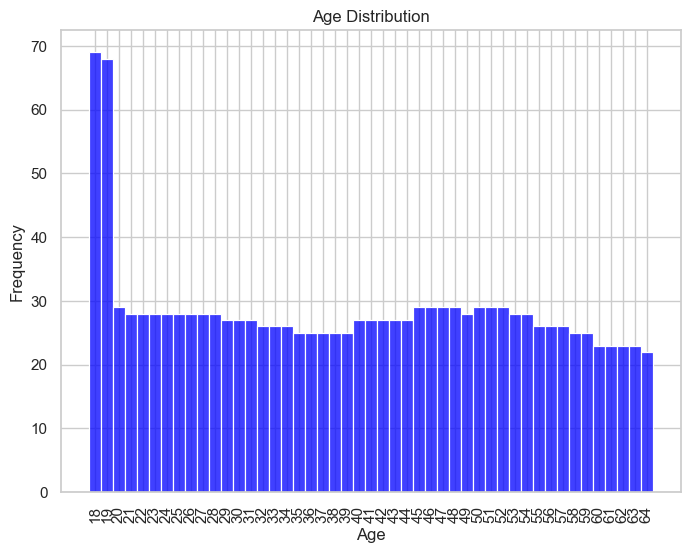

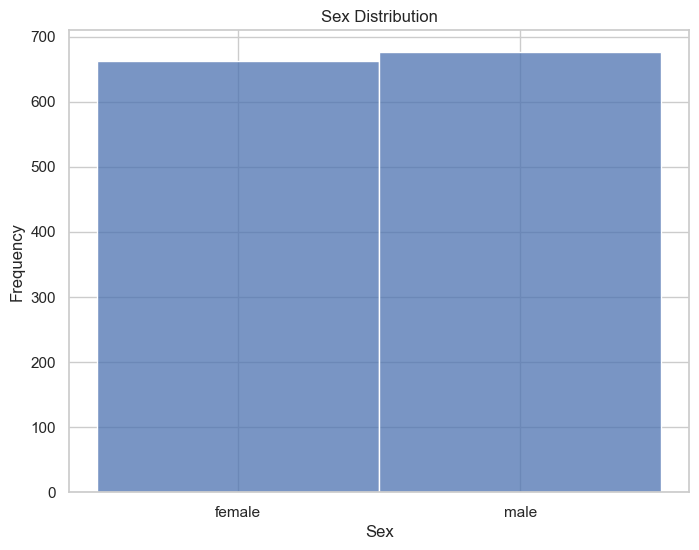

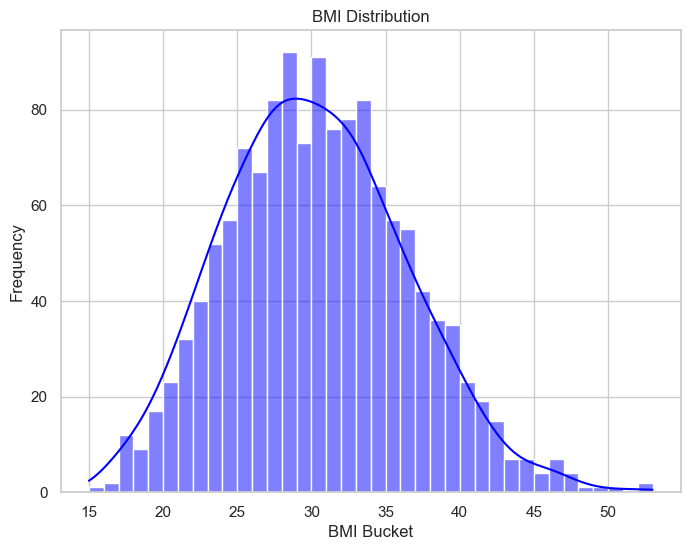

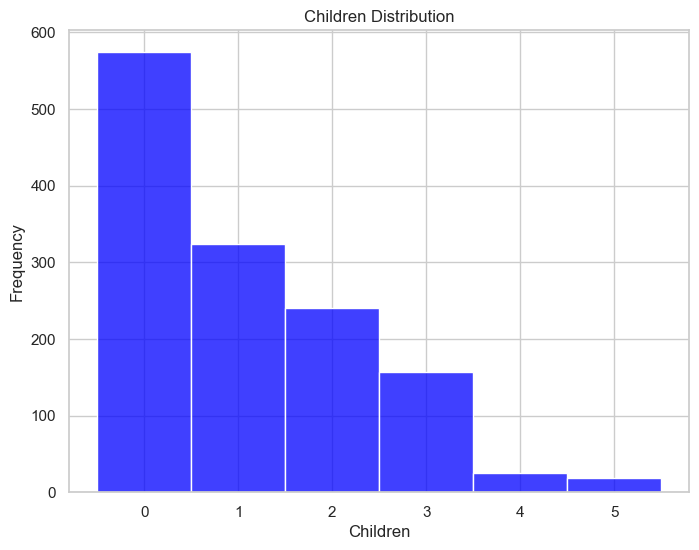

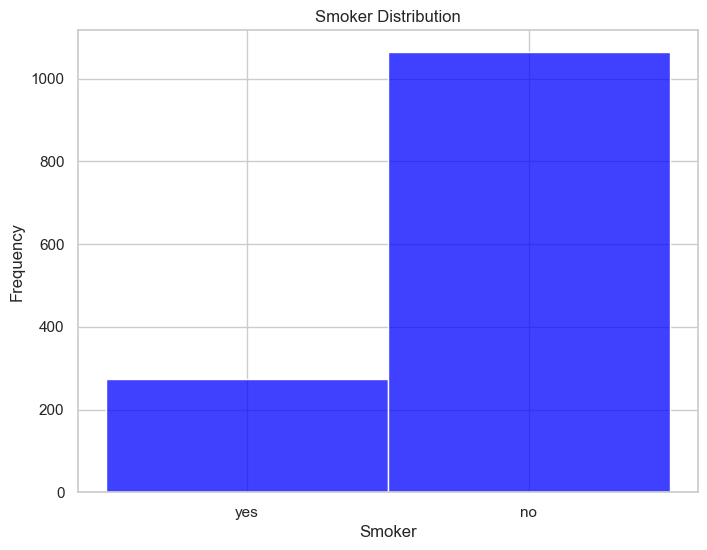

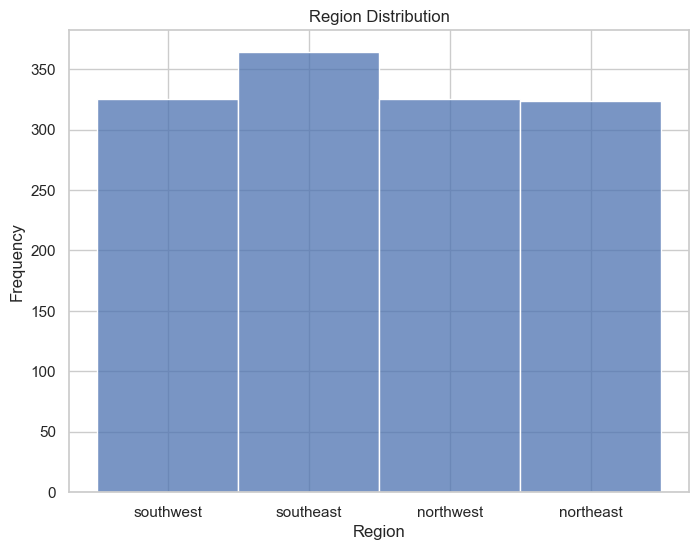

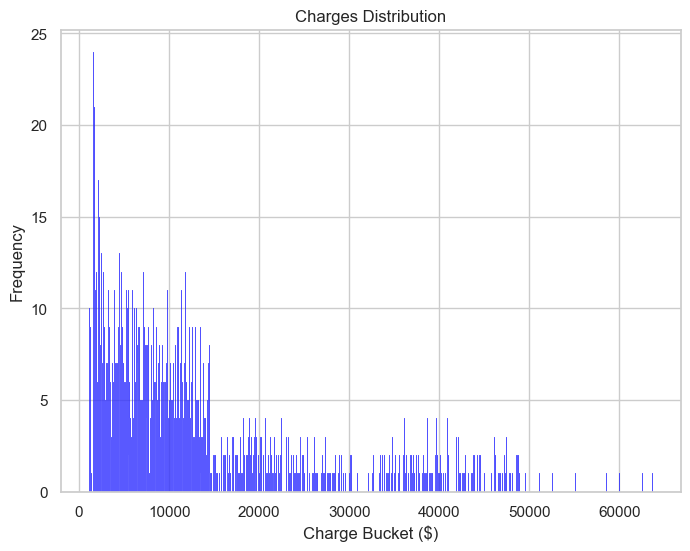

In [26]:
import csv
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


class MedicalData:
    def __init__(self, file):
        with open(file, newline='') as insurancecsv:
            insurance_data = csv.DictReader(insurancecsv)
            data = list(insurance_data) 
        self.ages = [row["age"] for row in data]
        self.sexes = [row["sex"] for row in data]
        self.bmis = [row['bmi'] for row in data]
        self.children = [row['children'] for row in data]
        self.smokers = [row['smoker'] for row in data]
        self.regions = [row['region'] for row in data]
        self.charges = [row['charges'] for row in data]
    
    def visualize_ages(self):
        temp = self.ages
        temp.sort()
        df_ages = pd.DataFrame(temp, columns=['Age'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_ages['Age'], kde=False, bins=range(int(df_ages['Age'].min()), int(df_ages['Age'].max()) + 2, 1), color='blue')
        plt.xticks(rotation=90)
        plt.title('Age Distribution')
        plt.xlabel('Age')
        plt.ylabel('Frequency')
        plt.show()
        return
    
    def visualize_sexes(self):
        df_sexes = pd.DataFrame(self.sexes, columns=['Sex'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_sexes['Sex'])
        plt.title('Sex Distribution')
        plt.xlabel('Sex')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_bmis(self):
        floored_bmis = [math.floor(float(row)) for row in self.bmis]
        df_bmis = pd.DataFrame(floored_bmis, columns=['BMI'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_bmis['BMI'],kde=True, bins=38, color='blue')
        plt.title('BMI Distribution')
        plt.xlabel('BMI Bucket')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_children(self):
        temp = self.children
        temp.sort()
        df_children = pd.DataFrame(temp, columns=['Children'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_children['Children'],kde=False, bins=6, color='blue')
        plt.title('Children Distribution')
        plt.xlabel('Children')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_smokers(self):
        df_smokers = pd.DataFrame(self.smokers, columns=['Smoker'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_smokers['Smoker'],kde=False, bins=2, color='blue')
        plt.title('Smoker Distribution')
        plt.xlabel('Smoker')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_regions(self):
        df_regions = pd.DataFrame(self.regions, columns=['Sex'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_regions['Sex'])
        plt.title('Region Distribution')
        plt.xlabel('Region')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_charges(self):
        bucketed_charges = [(math.floor(float(row)/100)*100) for row in self.charges]
        df_charges = pd.DataFrame(bucketed_charges, columns=['Charges'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_charges['Charges'], kde=False, bins=range(min(bucketed_charges),max(bucketed_charges) + 1, 100), color='blue')
        plt.title('Charges Distribution')
        plt.xlabel('Charge Bucket ($)')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_all(self):
        self.visualize_ages()
        self.visualize_sexes()
        self.visualize_bmis()
        self.visualize_children()
        self.visualize_smokers()
        self.visualize_regions()
        self.visualize_charges()
        return

    def analyze_ages(self):
        return 

    def analyze_sexes(self):
        return 

    def analyze_bmis(self):
        return 

    def analyze_children(self):
        return 

    def analyze_smokers(self):
        return 

    def analyze_regions(self):
        return 

    def analyze_charges(self):
        return 

    def analyze_all(self):
        return

insurance_data = MedicalData("insurance.csv")
insurance_data.visualize_all()


With the file now imported, let's start saving each column of the dataset separately so we can run analysis on each independently. The columns we have in the data set are:
- Age (Numerical)
- Sex (Categorical)
- BMI (Numerical)
- Children (Numerical)
- Smoker (Categorical)
- Region (Categorical)
- Charges (Numerical)

Let's see if we can plot the distrubtion of these items. Here's the distribution for age.

What about the split between Gender?

And let's do regions next!

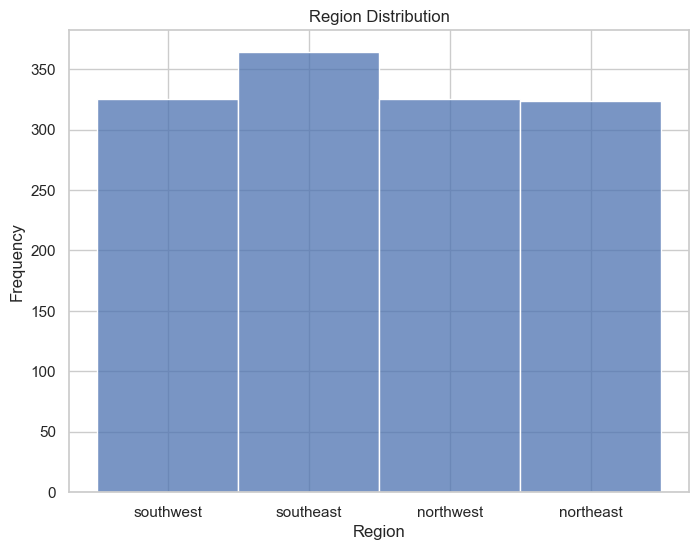

In [ ]:
regions = [row["region"] for row in data]



And BMI? Surely that might look like a normal distribution!

OK! Just three more columns left to visualize. How does the # of children look like?

We can see that just under have the respondents have 0 kids. And how are smokers distributed?

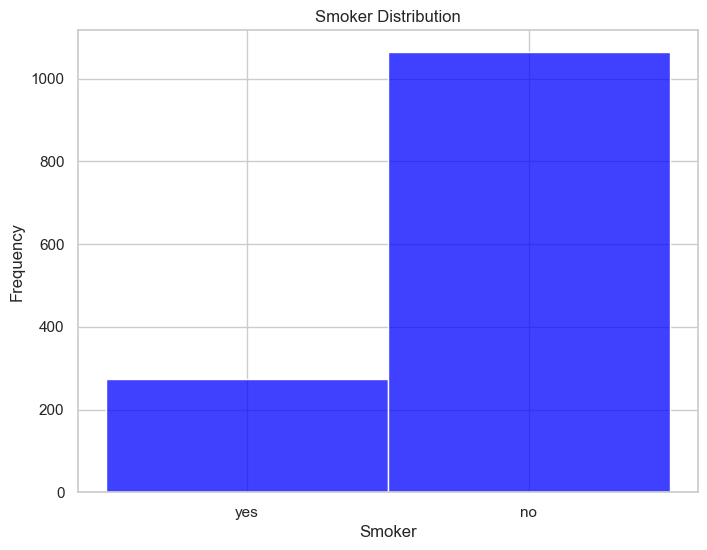

In [ ]:
smokers = [row["smoker"] for row in data]

# Create a pandas DataFrame
df_smokers = pd.DataFrame(smokers, columns=['Smoker'])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram to visualize the age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_smokers['Smoker'],kde=False, bins=2, color='blue')

# Add labels and title
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Ok, so it's important to note that our dataset is MOSTLY non-smokers. Let's keep that in mind for any biases that might appear.

Last up is the costs! So we know that costs range from roughly 1100 to almost 64000 dollars. We'll want to bucket the costs, otherwise we'll have a frequency of 1 for probably every value, which won't tell us much. My gut says that bucketing all costs within 100$ of each other (roughly 53 buckets) should give us a nice visualization while still being hopefully meaningfull. Let's try it!

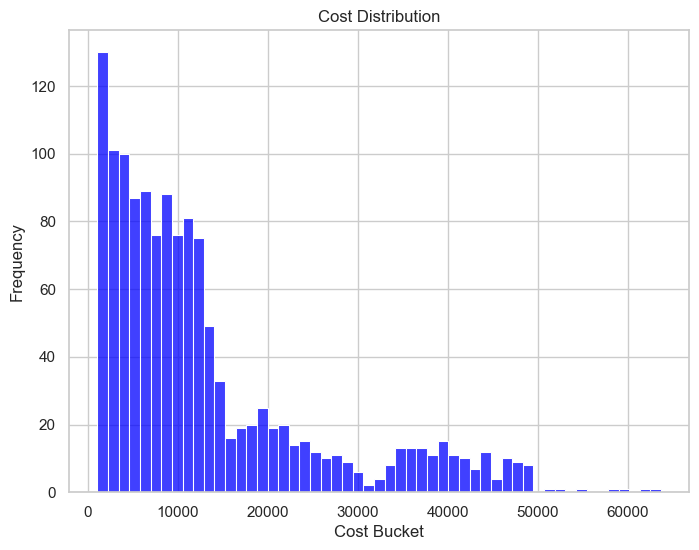

In [ ]:
bucketed_costs = [(math.floor((cost/100))*100) for cost in costs]

# Create a pandas DataFrame
df_costs = pd.DataFrame(bucketed_costs, columns=['Cost'])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram to visualize the age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_costs['Cost'],kde=False, bins=53, color='blue')

# Add labels and title
plt.title('Cost Distribution')
plt.xlabel('Cost Bucket')
plt.ylabel('Frequency')

# Show the plot
plt.show()

So we can see that the vast majority of the costs are under 14000$. Which, as a European, seems like a CRAZY amount to spend on health insurance.

So putting it all together, we know:

- Age is evenly distributed, with a slight bias towards 18 and 19 year olds
- Sex is evenly distributed
- BMI shows a normal distribution
- Almost half of the data set is from people without kids.
- Non-Smokers are over represented in the data set by a significant amount
- Region is evenly distributed
- Most costs are under $14000, with a long tail up to 63000

Now that we've gotten a pretty good handle on the data set, what are some interesting questions we might want to ask?

- How does each column correlate with the final cost?

Let's try to run some analysis and calculate the person correlation coefficient for each!

In [ ]:
df = pd.DataFrame(data[1:], columns=data[0])
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
correlation_matrix = df_encoded.corr()
correlation_with_cost = correlation_matrix['charges'].drop('charges')
print(correlation_with_cost)

age                 0.299571
bmi                 0.198464
children            0.068224
sex_male            0.057542
smoker_yes          0.787983
region_northwest   -0.039784
region_southeast    0.074131
region_southwest   -0.043657
Name: charges, dtype: float64


Looking at the correlation, we can see that being a smoker has the strongest correlation with a coefficient of 0.78. If you're a smoker, that greatly increases your insurance costs to nobody's surprise.

Age and BMI also have weak correlations.

Surprisingly, children has almost no correlation, as do the various regions

So that makes me wonder, how accurately can I predict somebody's insurance costs using only their age and if they're a smoker?

In [ ]:
smokers_numerical = [1 if row =="yes" else 0 for row in smokers]
print(smokers)
print(smokers_numerical)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.DataFrame(data[1:], columns=data[0])
df['smoker'] = df['smoker'].apply(lambda x:1 if x == 'yes' else 0)
X = df[['age', 'smoker']]
Y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Print the model coefficients
print(f'Model Coefficients (age, smoker): {model.coef_}')
print(f'Intercept: {model.intercept_}')

['yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no'

The R^2 is pretty good, meaning this model explains 72% of the variance in the cost of health insurance! However, the MSE is REALLY high, which is likely due to the wildly different insurance costs. These range from 1100 to 63000 in the data set. A $500 difference at a cost of 1100 is MASSIVE compared to at the 63000 range.